In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error


In [2]:
df = pd.read_csv("D:/datasets/proj_ds/train.csv")


In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})


In [6]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [7]:
df['Vehicle_Age'] = df['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})


In [8]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace({'Yes':0,'No':1})


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


In [11]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,0,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,1,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,0,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,1,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,1,27496.0,152.0,39,0


In [12]:
df = df.drop(['Region_Code','id','Policy_Sales_Channel'],axis=1)

df.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,0,44,1,0,2,0,40454.0,217,1
1,0,76,1,0,1,1,33536.0,183,0
2,0,47,1,0,2,0,38294.0,27,1
3,0,21,1,1,0,1,28619.0,203,0
4,1,29,1,1,0,1,27496.0,39,0


In [13]:
x = df.drop(['Annual_Premium'],axis=1)
y = df['Annual_Premium']


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression

In [15]:
model = LinearRegression() 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_prediction = model.predict(X_test)

mean_absolute_error(y_test,y_prediction)


12040.092739250436

In [17]:
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
mean_absolute_error(y_test,y_prediction)

12040.092739250436

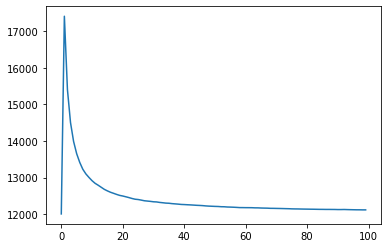

In [18]:
error = [12006.639062610595]
for i in range(1,100):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_prediction = knn.predict(X_test)
    error.append(mean_absolute_error(y_test,y_prediction))


plt.plot(range(100),error)

In [19]:
min_error = min(error)
error.index(min_error)

0

In [20]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train,y_train)

y_prediction = dtree.predict(X_test)

mean_absolute_error(y_prediction,y_test)

15138.568573591083

In [21]:
rf = RandomForestRegressor(n_estimators = 50)
rf.fit(X_train, y_train)
mean_absolute_error(y_prediction , y_test)

15138.568573591083

thus linear regression is the most accurate 

In [22]:
import pickle

In [59]:
knn= LinearRegression() 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
knn.fit(X_train,y_train)
y_prediction = knn.predict(X_test)
mean_absolute_error(y_test,y_prediction)

11982.323778520471

In [61]:
knn.predict([[0,44,1,0,2,0,217,1]])

C:\pyhton_software_PNY\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30810.61604043])